You can edit this notebook after copying to your drive.  
Click "Playgroundで開く" above and try them!  
  
(C) 2019 Tokyo Institute of Technology All Rights Reserved.  
@author Tatsuya Hiraoka  

In [0]:
# requirement
import numpy as np
import matplotlib.pyplot as plt

# soft-max
- p10

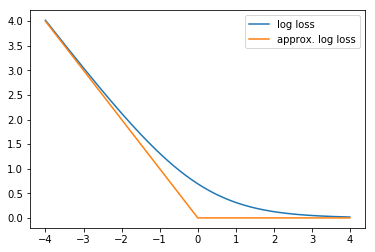

In [0]:
# soft-max
rr = np.arange(-4,4,0.01)
losslogit = np.log(1.0 + np.exp(-rr))
softMax = np.maximum(0, -rr)

plt.plot(rr, losslogit, label='log loss')
plt.plot(rr, softMax, label='approx. log loss')
plt.legend()

# Examples of convex functions on real number
- p36

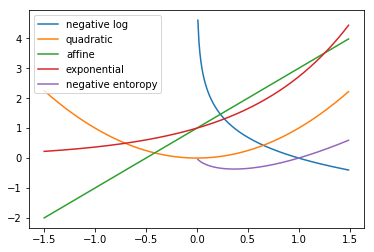

In [0]:
rr = np.arange(-1.5,1.5,0.01)
posin = rr[rr > 0.01];

plt.plot(posin, -np.log(posin), label='negative log')
plt.plot(rr, rr*rr, label='quadratic')

a = 2; b = 1;
plt.plot(rr, a*rr+b, label='affine')
plt.plot(rr, np.exp(rr), label='exponential')
plt.plot(posin, posin*np.log(posin), label='negative entoropy')

plt.legend()

# Examples of convex functions on real vector
- p37

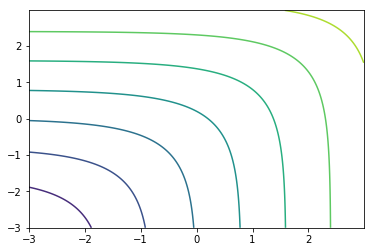

In [0]:
x_1 = np.arange(-3,3,0.01)
x_2 = np.arange(-3,3,0.02)
X1, X2 = np.mgrid[-3:3:0.01, -3:3:0.02]
fValue = np.zeros((len(x_1), len(x_2)))
fValue2 = np.zeros((len(x_1), len(x_2)))
for i in range(len(x_1)):
    for j in range(len(x_2)):
        fValue[i,j] = np.log(np.exp(x_1[i])+np.exp(x_2[j]))
        fValue2[i,j] = np.maximum(x_1[i], x_2[j])

plt.contour(X1, X2, fValue) # log-sum-exp

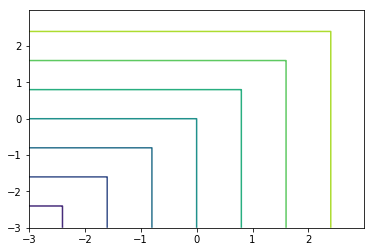

In [0]:
plt.contour(X1, X2, fValue2) # max

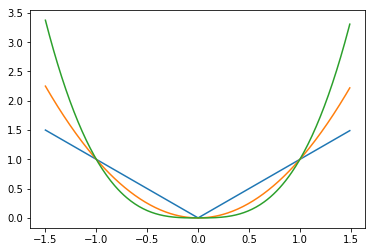

In [0]:
# norm
def plotNorm(p):
  plt.plot(rr, np.abs(rr)**p)

plotNorm(p=1)
plotNorm(p=2)
plotNorm(p=3)
  

# How can we use convex optimization?
- with python package mentioned in p44
- Hiraoka selected a "cvxpy" package for optimization with python.
  - we can call cvxopt mentioned in the slide from cvxpy as follows:

In [0]:
import cvxpy as cv
np.random.seed(10)
m = 20
n = 10
p = 4
A = np.random.randn(m,n)
b = np.random.randn(m,1)
C = np.random.randn(p,n)
d = np.random.randn(p,1)
e = np.random.rand()

# a variable to optimize
x = cv.Variable((n,1))

# objective to minimize/maximize
objective = cv.Minimize(cv.norm(A*x-b, 2))

# you can set conditions as a list
constraints = [C*x==d, cv.norm(x, np.inf) <= e]

# set problem with objective and conditions
prob = cv.Problem(objective, constraints)

# then run a solver with cvxopt
result = prob.solve(solver=cv.CVXOPT)

# you can access the optimized x as follows:
print(x.value)

[[-0.02921749]
 [ 0.51440322]
 [ 0.6546841 ]
 [-0.41145412]
 [ 0.3235783 ]
 [-0.02991389]
 [-0.24684257]
 [ 0.12984299]
 [ 0.55609114]
 [ 0.30371057]]


In [0]:
'''
tips:
  As you know, objective function must be convex.
  To set the function, you have to use prepared cvx functions 
  rather than write the loss function down as it is.
  (see, https://www.cvxpy.org/tutorial/functions/index.html)
  For example, a formulation x'Ax (' indicates trasposing) must be writen as
'''

A = np.array([[3, 0.5],[0.5, 1]])
x = cv.Variable((2,1))
obj_fn_with_cvxpy = cv.quad_form(x, A)

# confirm the curvature
print(obj_fn_with_cvxpy.curvature)

# you cannot express the formulation as follows:
obj_fn = x.T * A * x
print(obj_fn.curvature)

'''
All objective function must follow curvature rules.
In detail, see https://www.cvxpy.org/tutorial/dcp/index.html#curvature-rules
'''


CONVEX
UNKNOWN


'\nAll objective function must follow curvature rules.\nIn detail, see https://www.cvxpy.org/tutorial/dcp/index.html#curvature-rules\n'